In [20]:
import pandas as pd
import warnings
t=pd.read_csv("/content/drive/MyDrive/diabetes[1].csv")
print(t)
t1=t.describe()
print(t1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [21]:
dt=t.dtypes
shape=t.shape
print("t types of each column:\n",dt)
print("Shape:",shape)

t types of each column:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Shape: (768, 9)


In [22]:
nullvalues=t.isnull()
print(nullvalues)
t_mean=t.fillna(0)
print(t_mean)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

<ipython-input-23-422e01816907>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t.Age, bins = 20, ax=ax[0,0])
<ipython-input-23-422e01816907>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(t.Pregnancies, bins = 20, ax=ax[0,1])
<ipython-input-23-422e01816907>:6: UserWarning: 

`distplot` is a 

<Axes: xlabel='BMI', ylabel='Density'>

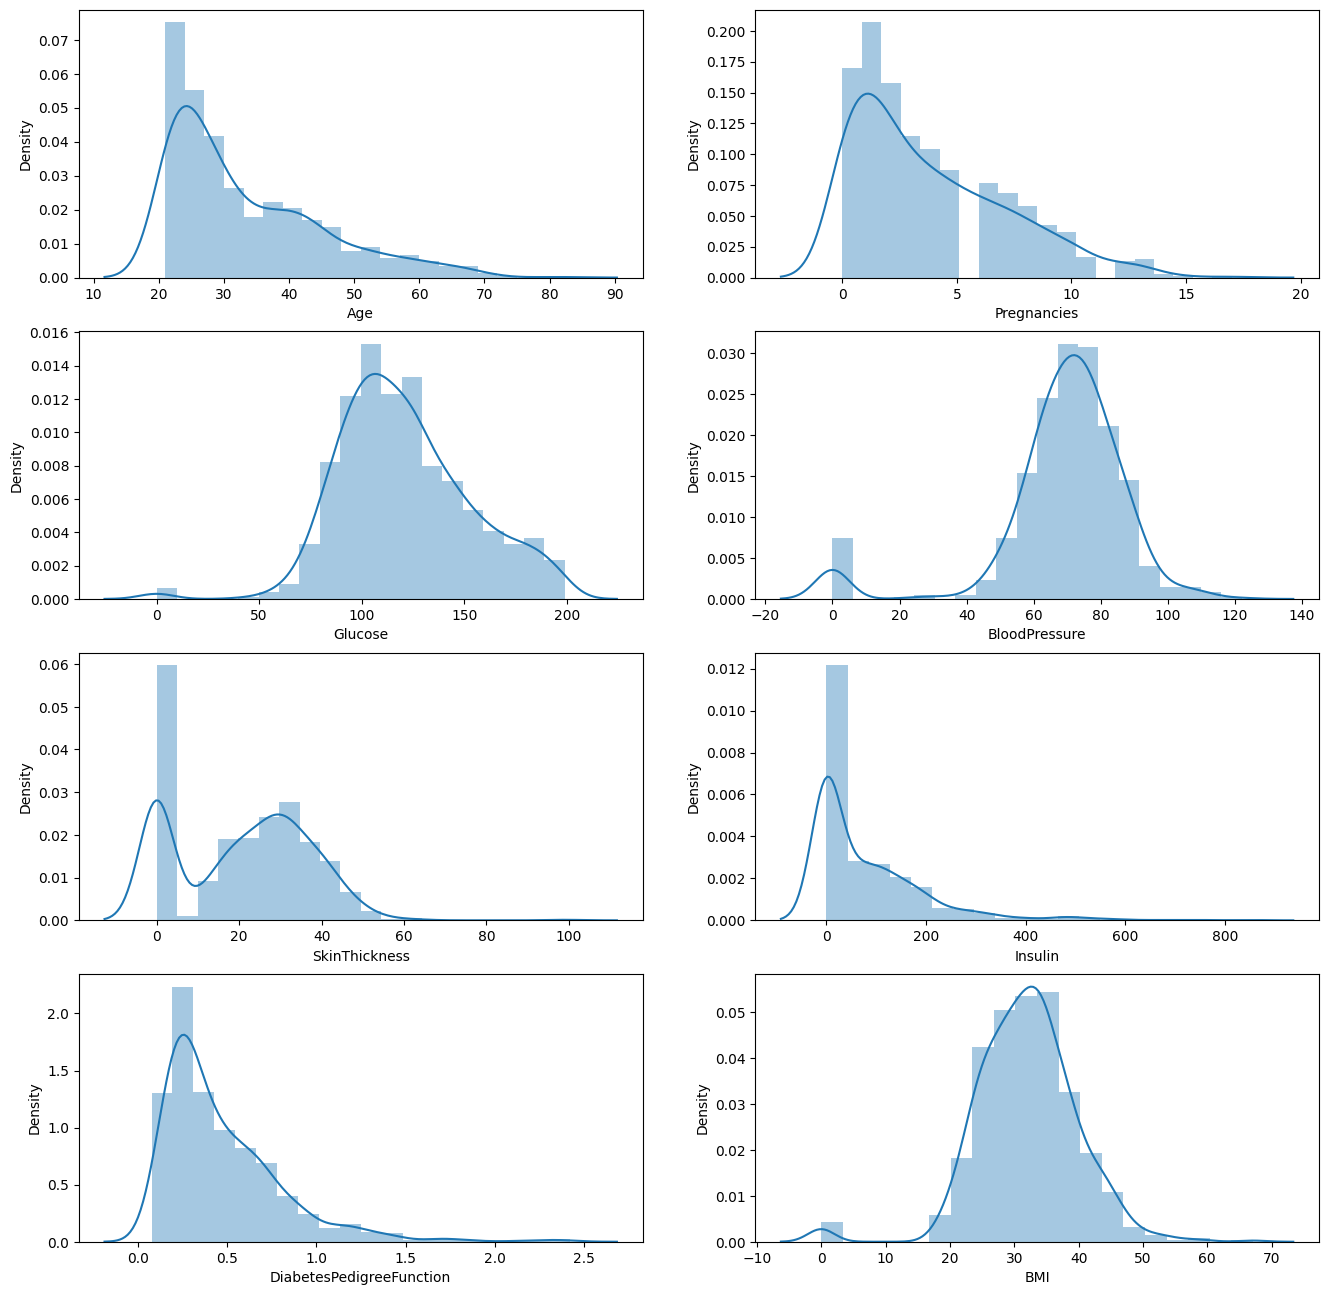

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(t.Age, bins = 20, ax=ax[0,0])
sns.distplot(t.Pregnancies, bins = 20, ax=ax[0,1])
sns.distplot(t.Glucose, bins = 20, ax=ax[1,0])
sns.distplot(t.BloodPressure, bins = 20, ax=ax[1,1])
sns.distplot(t.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(t.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(t.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(t.BMI, bins = 20, ax=ax[3,1])

In [24]:
from sklearn.model_selection import train_test_split

X = t.iloc[:,:-1]
y = t.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

print("Features (X):\n", X.head())
print("\nTarget (y):\n", y.head())

Features (X):
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Target (y):
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [25]:

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (614, 8)
Test set shape: (154, 8)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
t_scaled = pd.DataFrame(scaler.fit_transform(t), columns=t.columns)
print(t_scaled)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy of Logistic Regression: 0.8181818181818182
Precision: 0.8292682926829268
Recall: 0.6181818181818182
F1-score: 0.7083333333333334
Confusion Matrix:
[[92  7]
 [21 34]]


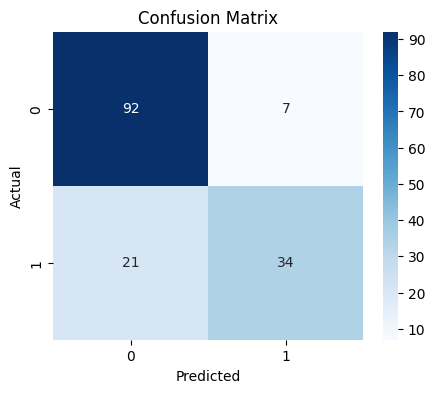

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
lrpred = model.predict(X_test)
print(f"Accuracy of Logistic Regression: { accuracy_score(y_test, lrpred) }")
y_pred= model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Best Parameters: {'criterion': 'entropy', 'max_depth': 3}
Decision Tree Accuracy: 0.7727272727272727
Precision: 0.7272727272727273
Recall: 0.5818181818181818
F1-score: 0.6464646464646464
Confusion Matrix:
[[87 12]
 [23 32]]


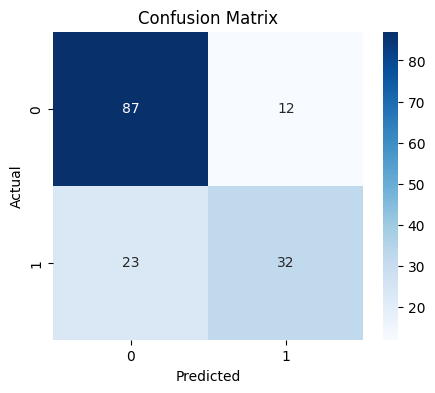

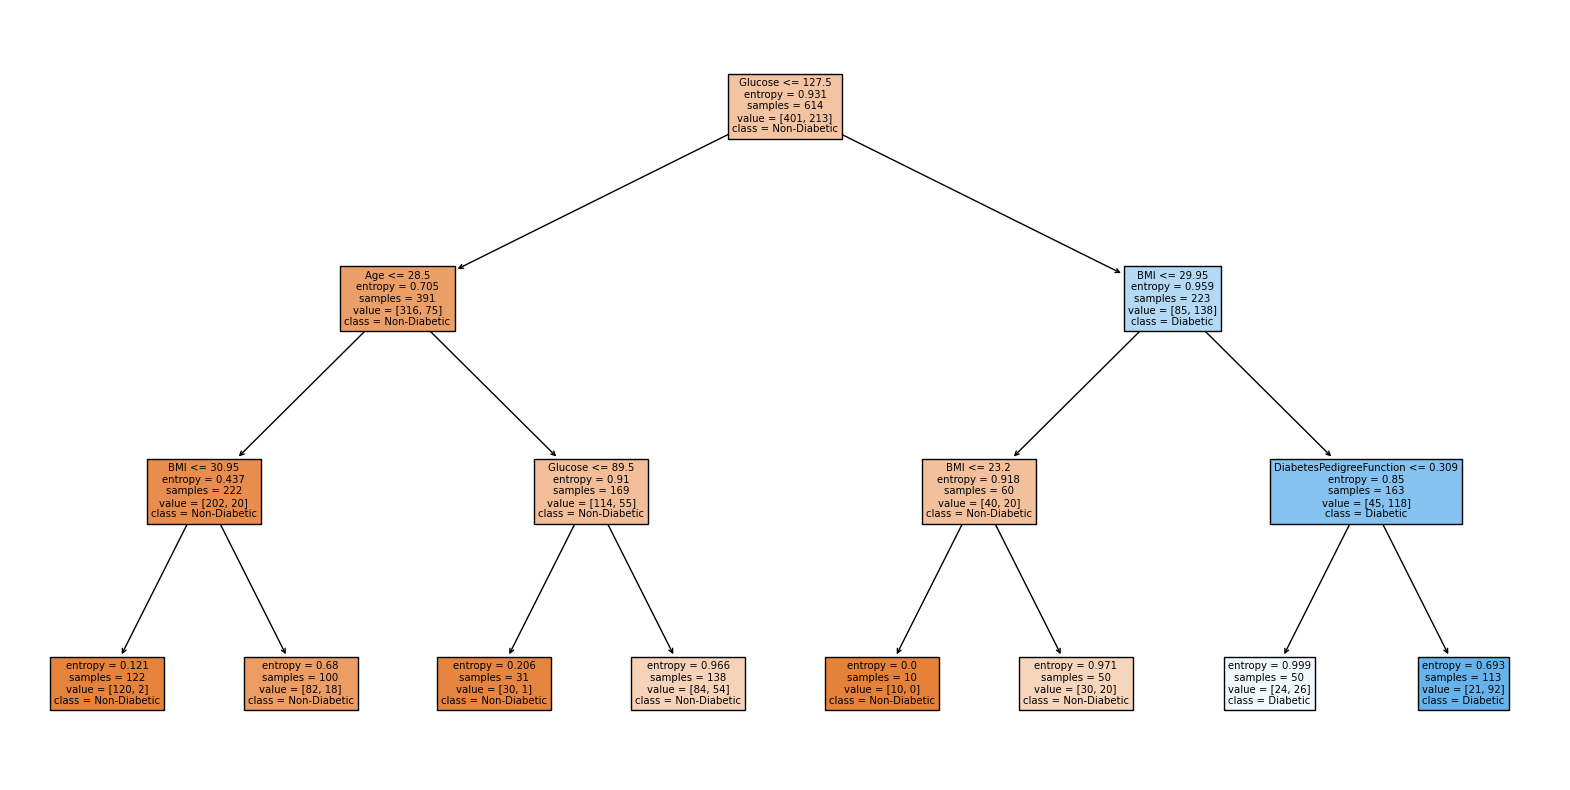

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 7, 10]}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'])
best_dt_classifier.fit(X_train, y_train)
y_pred_dt= best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)


# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()

KNN Accuracy: 0.6818181818181818
Confusion Matrix:
[[75 24]
 [25 30]]
Precision: 0.5555555555555556
Recall: 0.5454545454545454
F1-score: 0.5504587155963303
Confusion Matrix:
[[75 24]
 [25 30]]


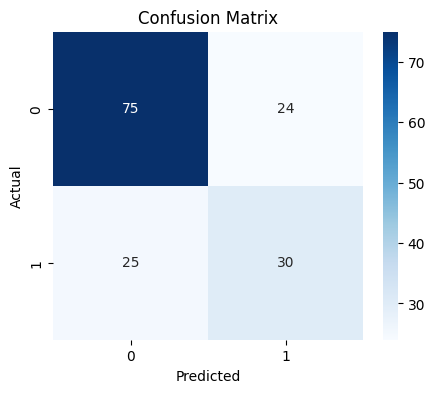

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.8116883116883117
Precision: 0.7954545454545454
Recall: 0.6363636363636364
F1-score: 0.7070707070707071
Confusion Matrix:
[[90  9]
 [20 35]]


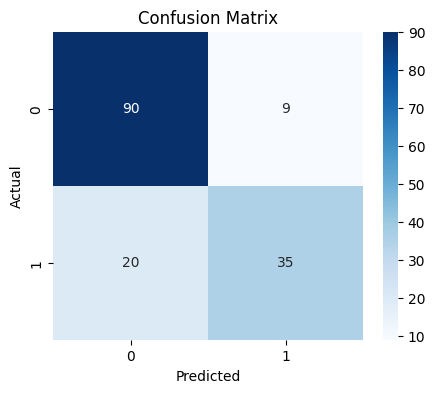

In [31]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.79
Recall: 0.735
Precision: 0.65
F1: 0.69
[[90  9]
 [20 35]]


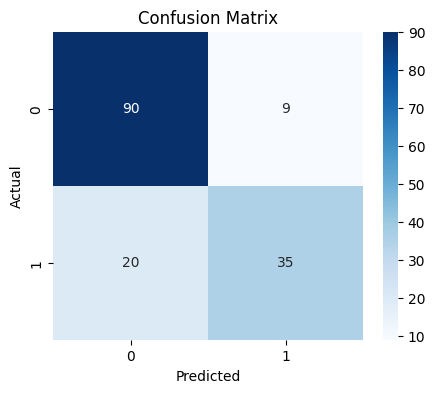

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.7727272727272727
Precision: 0.6851851851851852
Recall: 0.6727272727272727
F1 Score: 0.6788990825688074
[[90  9]
 [20 35]]


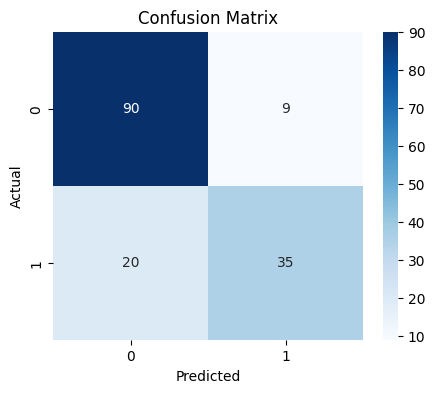

In [33]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1_score = f1_score(y_test, ada_pred)
print("Accuracy:", ada_accuracy)
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("F1 Score:", ada_f1_score)
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.8116883116883117
Precision: 0.75
Recall: 0.7090909090909091
F1-score: 0.7289719626168225
Confusion Matrix:
[[86 13]
 [16 39]]


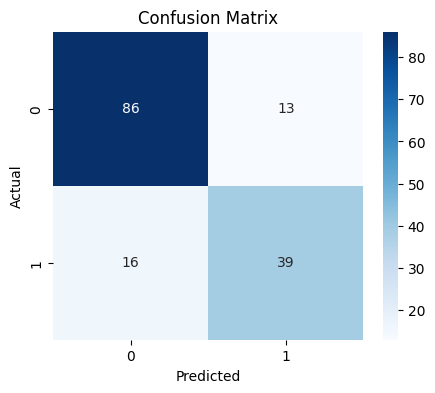

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
predictions_gb = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test,predictions_gb)
precision = precision_score(y_test,predictions_gb)
recall = recall_score(y_test,predictions_gb)
f1 = f1_score(y_test,predictions_gb)
conf_matrix = confusion_matrix(y_test,predictions_gb)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()